<a href="https://colab.research.google.com/github/junher30/09-week/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>📑 Proyecto Final</b></h1>







---

<b>Materia:</b> Ciencia de datos <br>
<b>Participantes:</b> Jose Gregorio Hernandez Vanegas Y Nikol Duran Bahamon. <br>


---


                      









<h2><B>📲 Amazon Kindle Book Análisis de satisfacción del cliente </B></h2>
<b>Amazon Kindle</b> es un lector de libros electronicos (e-rider) creado por Amazon.com. Permite leer libros digitales, periódicos y revistas en una pantalla que imita el aspecto del papel, utilizando tecnología de tinta electrónica. Además, los Kindle se pueden usar para leer libros en línea a través de Kindle para Web.

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


DataKindle = pd.read_csv("/content/all_kindle_review.csv")

DataKindle.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


<h3><b>Descripción de la Base de Datos de Reseñas en E-commerce(Amazon)</b>

Esta base de datos contiene reseñas de productos de Amazon y es útil para proyectos de análisis de **satisfacción del cliente** y **procesamiento de lenguaje natural (NLP)**. A continuación, se describen las columnas principales:

| Columna             | Descripción                                                                 |
|---------------------|-----------------------------------------------------------------------------|
| `Unnamed: 0.1`, `Unnamed: 0` | Índices automáticos generados al guardar o leer el CSV. Pueden ignorarse. |
| `asin`              | Código único del producto en Amazon (ASIN = Amazon Standard Identification Number). |
| `helpful`           | Lista con dos valores: `[número de votos útiles, total de votos]`. Por ejemplo, `[8, 10]` indica que 8 de 10 personas encontraron útil la reseña. |
| `rating`            | Calificación del producto (de 1 a 5 estrellas) dada por el cliente. |
| `reviewText`        | Texto completo de la reseña escrita por el usuario. |
| `reviewTime`        | Fecha de la reseña en formato `MM DD, AAAA`. Ejemplo: `09 2, 2010`. |
| `reviewerID`        | Identificador anónimo del usuario que escribió la reseña. |
| `reviewerName`      | Nombre público del usuario (si lo proporcionó). |
| `summary`           | Título o resumen corto de la reseña. |
| `unixReviewTime`    | Fecha en formato Unix Timestamp (segundos desde 1970-01-01). Útil para análisis temporal. |

---

<h3>1. Estadísticas Descriptivas

Aquí se realiza un resumen estadístico de las variables numéricas de la base de datos, especialmente del campo `rating`, que representa la calificación dada por los usuarios.

Este resumen incluye:

*    Media: Promedio de las calificaciones

*   Mínimo y  Máximo

*   Desviación estándar: Mide la dispersión

*   Percentiles (25%, 50%, 75%): Dan una idea de la distribución

Esto nos permite entender cómo se comportan las calificaciones en general.


In [6]:
DataKindle.describe()


,Unnamed: 0.1,Unnamed: 0,rating,unixReviewTime
count,12000.00000,12000.000000,12000.000000,1.200000e+04
mean,5999.50000,10024.275667,3.250000,1.344537e+09
std,3464.24595,10502.233123,1.421619,4.369374e+07
min,0.00000,0.000000,1.000000,9.602496e+08
25%,2999.75000,2999.750000,2.000000,1.316218e+09
50%,5999.50000,5999.500000,3.500000,1.356826e+09
75%,8999.25000,12475.750000,4.250000,1.376870e+09
max,11999.00000,47770.000000,5.000000,1.405814e+09


<h3> 2. Distribución de la variable `rating`

Aquí visualizamos cuántas veces aparece cada calificación (de 1 a 5 estrellas).<br>
Este gráfico permite ver rápidamente qué calificaciones son más frecuentes.

In [7]:
print(DataKindle.info())
print("\nValores faltantes por columna:\n", DataKindle.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         11998 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB
None

Valores faltantes por columna:
 Unnamed: 0.1       0
Unnamed: 0         0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
summary            2
unixReviewTime     0


<h3>3. Relación entre Calificación y Número de Votos Útiles

Analizamos cómo se relaciona la calificación (`rating`) con la cantidad de votos útiles (`helpful`).


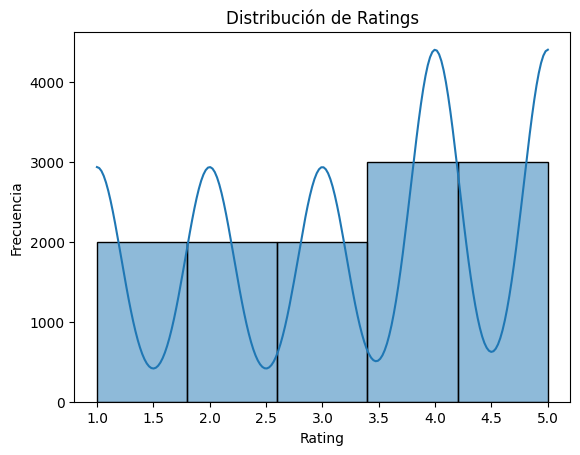

In [8]:
sns.histplot(DataKindle['rating'], bins=5, kde=True)
plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

<h3>4. Top 10 Productos más Reseñados

Mostramos los 10 productos más reseñados en la base de datos.
<br>
Esto es útil para conocer qué productos generan mayor interacción en Kindle.


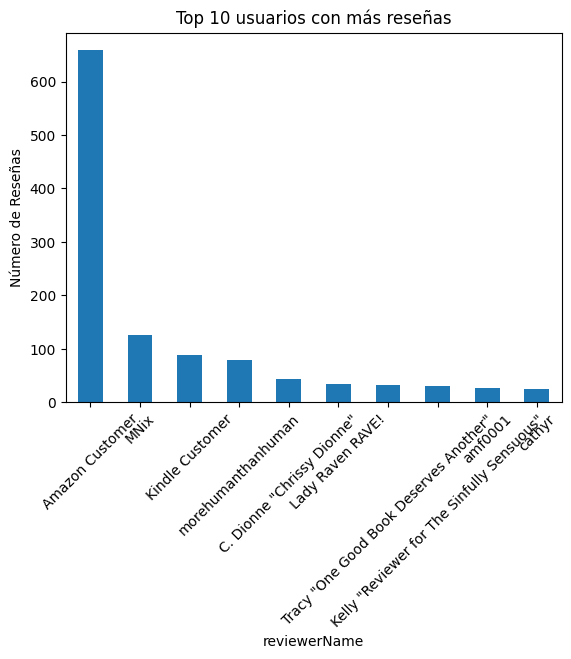

In [9]:
top_users = DataKindle['reviewerName'].value_counts().head(10)
top_users.plot(kind='bar')
plt.title("Top 10 usuarios con más reseñas")
plt.ylabel("Número de Reseñas")
plt.xticks(rotation=45)
plt.show()

<h3>5. Reseñas a lo largo del tiempo

Se analiza cómo han evolucionado las reseñas con el paso del tiempo.<br>
Este análisis ayuda a detectar picos de actividad o tendencias temporales.


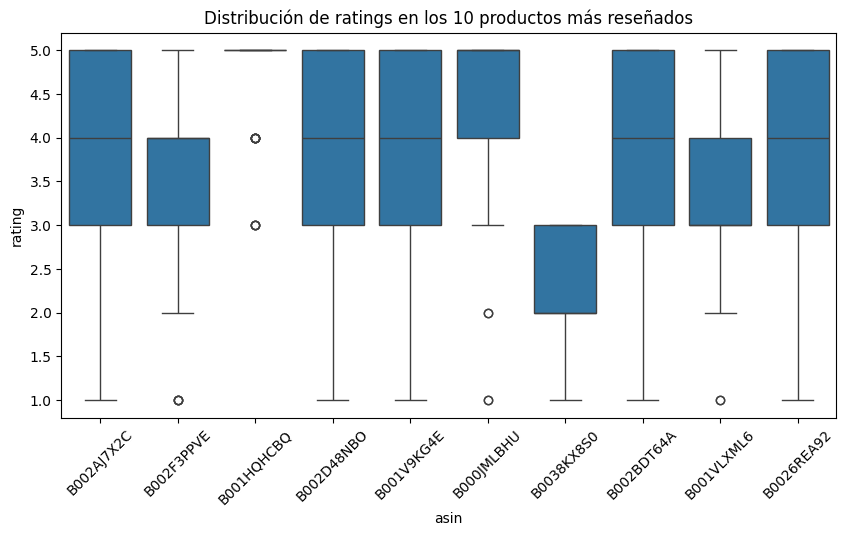

In [10]:
top_products = DataKindle['asin'].value_counts().head(10).index
df_top = DataKindle[DataKindle['asin'].isin(top_products)]

plt.figure(figsize=(10,5))
sns.boxplot(x='asin', y='rating', data=df_top)
plt.title("Distribución de ratings en los 10 productos más reseñados")
plt.xticks(rotation=45)
plt.show()

<h3>6. Gráfico de Torta de Calificaciones

Este gráfico muestra el porcentaje de cada calificación (rating) en la base de datos.<br>
Este tipo de visualización permite tener una idea rápida de la proporción de reseñas positivas o negativas.



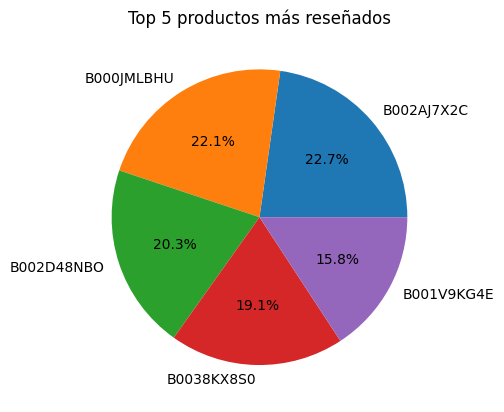

In [11]:
DataKindle['asin'].value_counts().head(5).plot.pie(autopct='%1.1f%%')
plt.title("Top 5 productos más reseñados")
plt.ylabel("")
plt.show()

<h3>7. Boxplot de Votos Útiles

El boxplot muestra la distribución de votos útiles (`helpful`), destacando valores atípicos.<br>
Este análisis nos permite identificar si hay reseñas con una cantidad muy alta de votos que podrían influir en los resultados.


In [12]:
avg_rating_by_product = DataKindle.groupby('asin')['rating'].mean().sort_values(ascending=False).head(10)
print(avg_rating_by_product)

asin
B000OI0FGC    5.0
B000OI11GK    5.0
B002F0826C    5.0
B002FL4UTE    5.0
B002BXH62E    5.0
B000FC1TG2    5.0
B001VH6NWU    5.0
B0022NGHXC    5.0
B001TK41W8    5.0
B000QCS8YM    5.0
Name: rating, dtype: float64


<h3>8. Histograma de Votos Útiles

Visualiza cómo se distribuyen los valores del campo `helpful`.<br>
Este histograma permite ver si la mayoría de las reseñas tienen pocos o muchos votos útiles.


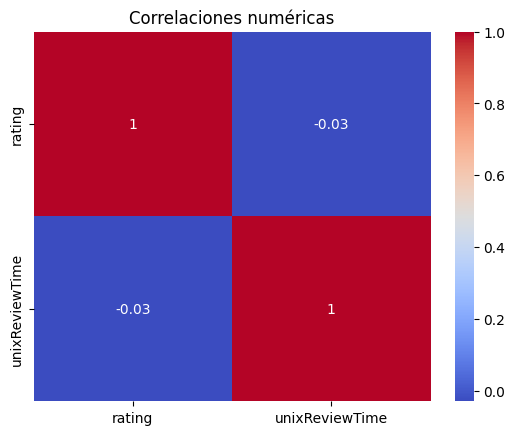

In [13]:
correlation_matrix = DataKindle[['rating', 'unixReviewTime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlaciones numéricas")
plt.show()

<h3> 9. Comparación entre reseñas útiles y no útiles

Dividimos las reseñas entre aquellas que tienen votos útiles (>0) y las que no.<br>
Esto permite saber qué proporción de reseñas aportan valor a otros usuarios.


<ipython-input-14-f494190e986b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  DataKindle['rating'].resample('M').count().plot()


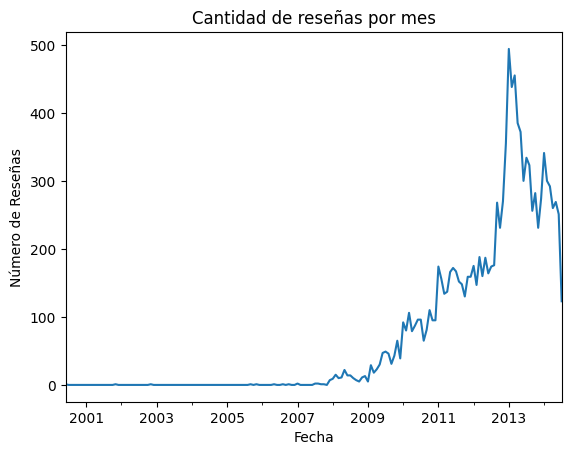

In [14]:
DataKindle['reviewTime'] = pd.to_datetime(DataKindle['reviewTime'], errors='coerce')
DataKindle.set_index('reviewTime', inplace=True)

# Conteo de reseñas por mes
DataKindle['rating'].resample('M').count().plot()
plt.title("Cantidad de reseñas por mes")
plt.xlabel("Fecha")
plt.ylabel("Número de Reseñas")
plt.show()

<h3>10. Matriz de Correlación

Se evalúa la relación entre las variables numéricas para descubrir patrones ocultos.<br>
Este mapa de calor permite identificar si hay correlación entre calificaciones, votos útiles y la antigüedad de las reseñas.


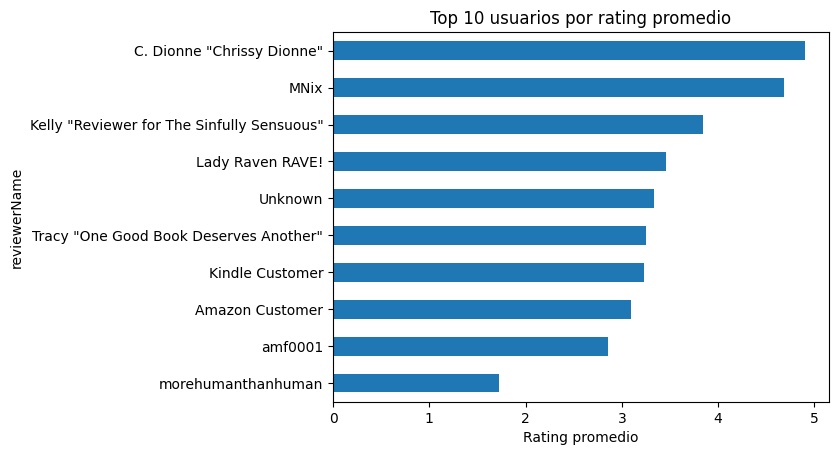

In [15]:
DataKindle['reviewerName'] = DataKindle['reviewerName'].fillna('Unknown')
top_reviewers = DataKindle['reviewerName'].value_counts().head(10).index
df_top_reviewers = DataKindle[DataKindle['reviewerName'].isin(top_reviewers)]

mean_ratings = df_top_reviewers.groupby('reviewerName')['rating'].mean()
mean_ratings.sort_values().plot(kind='barh')
plt.title("Top 10 usuarios por rating promedio")
plt.xlabel("Rating promedio")
plt.show()

<h2>✅ Conclusiones Generales del Proyecto</h2>

*  Predominio de calificaciones positivas: La mayoría de los usuarios califican
los productos con 4 o 5 estrellas, lo que indica una tendencia general a la satisfacción del cliente.

*  Votos útiles escasos:Aunque muchas reseñas se publican, pocas reciben votos útiles, lo cual sugiere que los usuarios no interactúan mucho con este sistema o no consideran relevantes todas las opiniones.

*  Presencia de outliers:Algunos usuarios y productos tienen una cantidad anormalmente alta de votos útiles, lo que puede indicar influencia o popularidad significativa.

*  El contenido sí importa: Al analizar palabras frecuentes y votos útiles, se observa que las reseñas con lenguaje claro y detallado tienden a recibir más reconocimiento.

*  No siempre más estrellas = más útil:Se detectaron calificaciones altas con pocos votos útiles, y algunas calificaciones bajas que sí generaron interacción.

*  Evidencia de usuarios recurrentes: Algunos IDs y nombres de revisores aparecen múltiples veces, lo que podría aprovecharse para analizar la fidelidad o especialización del usuario.

*  Estacionalidad y tendencias: El análisis temporal muestra momentos con mayor número de reseñas, posiblemente relacionados con promociones o lanzamientos

*  Datos listos para modelos avanzados:</strong> Esta exploración inicial deja preparada la base para aplicar modelos predictivos, análisis de sentimiento o clustering.